In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from google.colab import userdata
token =userdata.get('Cryptonite-Token')

In [2]:
!git config --global user.email "idantsri2007@gmail.com"
!git config --global user.name "SILETRO"

In [3]:
!git clone https://{token}@github.com/SILETRO/Cryptonite-RTP-Idant.git
%cd Cryptonite-RTP-Idant

Cloning into 'Cryptonite-RTP-Idant'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 82 (delta 22), reused 63 (delta 13), pack-reused 0 (from 0)
Receiving objects: 100% (82/82), 1.57 MiB | 10.41 MiB/s, done.
Resolving deltas: 100% (22/22), done.
/content/Cryptonite-RTP-Idant


In [4]:
%cd /content/Cryptonite-RTP-Idant

/content/Cryptonite-RTP-Idant


In [5]:
!mkdir Task-4

In [12]:
!cp '/content/drive/MyDrive/Colab Notebooks/Fashin_MNIST_CNN.ipynb' Task-4/

cp: cannot stat '/content/drive/MyDrive/Colab Notebooks/Fashin_MNIST_CNN.ipynb': No such file or directory


In [10]:
!git add .

In [11]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train, y_train), (X_test, y_test) = fashion_mnist

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
from sklearn.model_selection import train_test_split
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5,stratify=y_test,random_state=42)

In [18]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

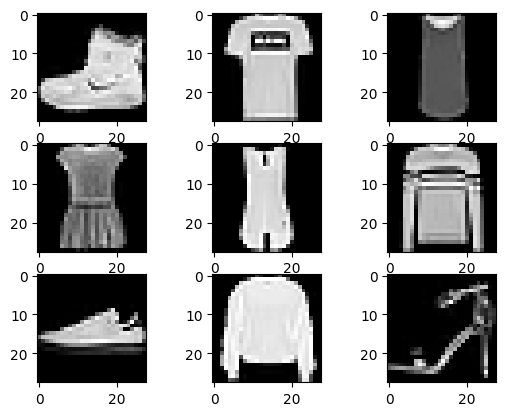

In [8]:
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(X_train[i],cmap='grey')

In [5]:
X_train,X_val,X_test = X_train/255.,X_val/255.,X_test/255.

In [11]:
from functools import partial
Conv2D = partial(tf.keras.layers.Conv2D,kernel_size=3,activation='relu',padding='same',kernel_initializer='he_normal')

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28,28)),
    tf.keras.layers.Reshape(target_shape=(28,28,1)),
    Conv2D(filters=64,kernel_size=5),
    tf.keras.layers.MaxPool2D(),
    Conv2D(filters=128),
    tf.keras.layers.MaxPool2D(),
    Conv2D(filters=256),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10,activation='softmax')
])

In [20]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001) ,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [22]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)
history=model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100,callbacks=[stop_early])

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.4955 - loss: 1.4088 - val_accuracy: 0.8200 - val_loss: 0.5105
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7430 - loss: 0.7297 - val_accuracy: 0.8502 - val_loss: 0.4124
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8048 - loss: 0.5676 - val_accuracy: 0.8674 - val_loss: 0.3716
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8325 - loss: 0.4950 - val_accuracy: 0.8798 - val_loss: 0.3357
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8542 - loss: 0.4349 - val_accuracy: 0.8890 - val_loss: 0.3145
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8656 - loss: 0.3981 - val_accuracy: 0.8860 - val_loss: 0.3004
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8786 - loss: 0.3647 - val_accuracy: 0.8982 - val_loss: 0.2850
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8851 - loss: 

In [74]:
model.evaluate(X_test,y_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9031 - loss: 0.2801


[0.25414571166038513, 0.9129999876022339]

In [23]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,precision_score,recall_score,f1_score
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred,axis=1)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86       500
           1       1.00      0.99      0.99       500
           2       0.87      0.88      0.87       500
           3       0.90      0.94      0.92       500
           4       0.85      0.90      0.88       500
           5       0.98      0.99      0.99       500
           6       0.79      0.75      0.77       500
           7       0.96      0.97      0.97       500
           8       0.98      0.98      0.98       500
           9       0.98      0.96      0.97       500

    accuracy                           0.92      5000
   macro avg       0.92      0.92      0.92      5000
weighted avg       0.92      0.92      0.92      5000



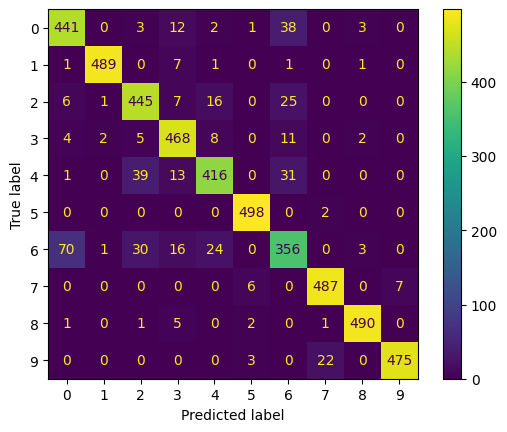

In [28]:
cm = confusion_matrix(y_test,y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [30]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 5.6 MB/s eta 0:00:00


In [65]:
import tensorflow as tf
import keras_tuner as kt

def build_model(hp):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Input(shape=(28, 28)))
  model.add(tf.keras.layers.Reshape(target_shape=(28, 28, 1)))


  for i in range(hp.Int('num_conv_layers', 1, 3)):
    model.add(tf.keras.layers.Conv2D(filters=hp.Int(f'filters_{i}', min_value=32, max_value=256, step=32),
                                     kernel_size=hp.Int(f'sizes{i}',min_value=3,max_value=5),
                                     activation='relu',padding='same'))
    model.add(tf.keras.layers.MaxPooling2D())


  model.add(tf.keras.layers.Flatten())

  for i in range(hp.Int('num_dense_layers', 1, 2)):
    model.add(tf.keras.layers.Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),activation='relu',kernel_initializer='he_normal'))

  model.add(tf.keras.layers.Dropout(hp.Float('dropout_rate', min_value=0.1, max_value=0.7, step=0.1)))
  model.add(tf.keras.layers.Dense(10, activation='softmax'))

  hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4])
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  return model

In [66]:
random_search_tuner = kt.RandomSearch(build_model, objective="val_accuracy",directory="fashion_mnist", project_name="search", max_trials=15, overwrite=True, seed=42)
random_search_tuner.search(X_train, y_train, epochs=50,validation_data=(X_val, y_val),callbacks=[stop_early])

Trial 15 Complete [00h 00m 48s]
val_accuracy: 0.9214000105857849

Best val_accuracy So Far: 0.9241999983787537
Total elapsed time: 00h 34m 25s


In [67]:
best_model = random_search_tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [68]:
best_model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val),callbacks=[stop_early])

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9414 - loss: 0.1585 - val_accuracy: 0.9216 - val_loss: 0.2144
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9500 - loss: 0.1322 - val_accuracy: 0.9280 - val_loss: 0.2209
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9563 - loss: 0.1147 - val_accuracy: 0.9260 - val_loss: 0.2194
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9656 - loss: 0.0958 - val_accuracy: 0.9210 - val_loss: 0.2648


In [72]:
top_params = random_search_tuner.get_best_hyperparameters(num_trials=5)

In [73]:
top_params[0].values

{'num_conv_layers': 2,
 'filters_0': 64,
 'sizes0': 3,
 'num_dense_layers': 1,
 'units_0': 256,
 'dropout_rate': 0.30000000000000004,
 'learning_rate': 0.001,
 'filters_1': 128,
 'sizes1': 3,
 'units_1': 32}

In [69]:
y_pred = best_model.predict(X_test)
y_pred_class = np.argmax(y_pred,axis=1)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [70]:
best_model.evaluate(X_test,y_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9079 - loss: 0.2632


[0.23493656516075134, 0.9178000092506409]

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       500
           1       0.99      0.98      0.99       500
           2       0.85      0.89      0.87       500
           3       0.91      0.92      0.92       500
           4       0.88      0.85      0.87       500
           5       0.98      0.99      0.99       500
           6       0.79      0.75      0.77       500
           7       0.96      0.97      0.96       500
           8       0.98      0.99      0.98       500
           9       0.97      0.95      0.96       500

    accuracy                           0.92      5000
   macro avg       0.92      0.92      0.92      5000
weighted avg       0.92      0.92      0.92      5000



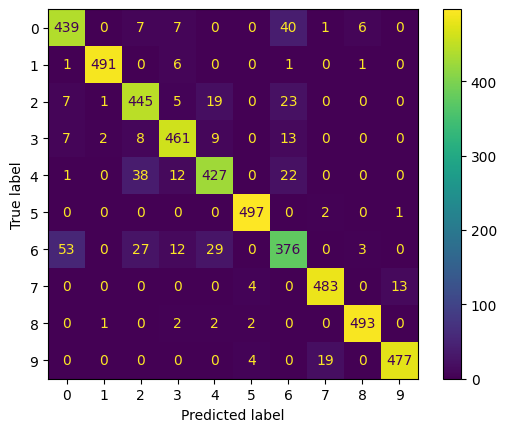

In [75]:
cm = confusion_matrix(y_test,y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()